In [1]:
!pip install statsmodels



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

plt.rcParams['figure.figsize'] = (10,5)


In [3]:
import os
os.listdir()


['.ipynb_checkpoints', 'monthly_sales.csv', 'Untitled.ipynb']

In [4]:
df = pd.read_csv("monthly_sales.csv")

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df.head()


,sales
date,
2022-01-01,200
2022-02-01,220
2022-03-01,250
2022-04-01,270
2022-05-01,300


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2022-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   24 non-null     int64
dtypes: int64(1)
memory usage: 384.0 bytes


,sales
count,24.000000
mean,430.000000
std,141.605699
min,200.000000
25%,317.500000
50%,425.000000
75%,545.000000
max,680.000000


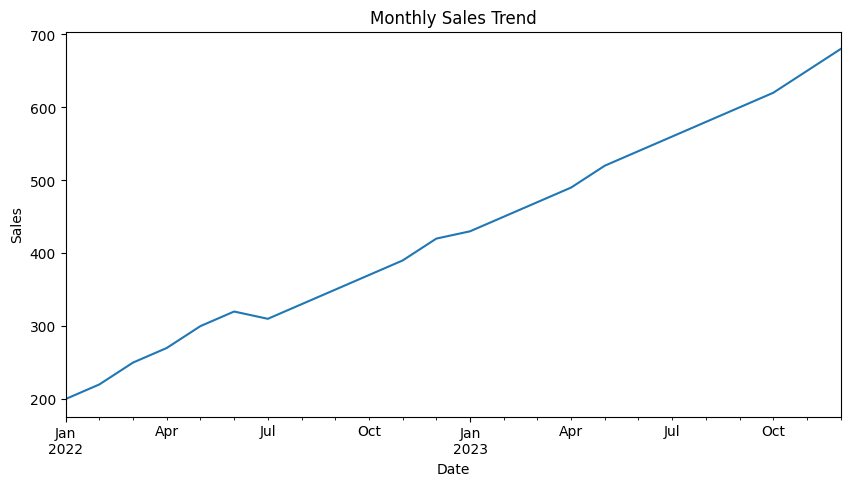

In [6]:
df['sales'].plot(title="Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


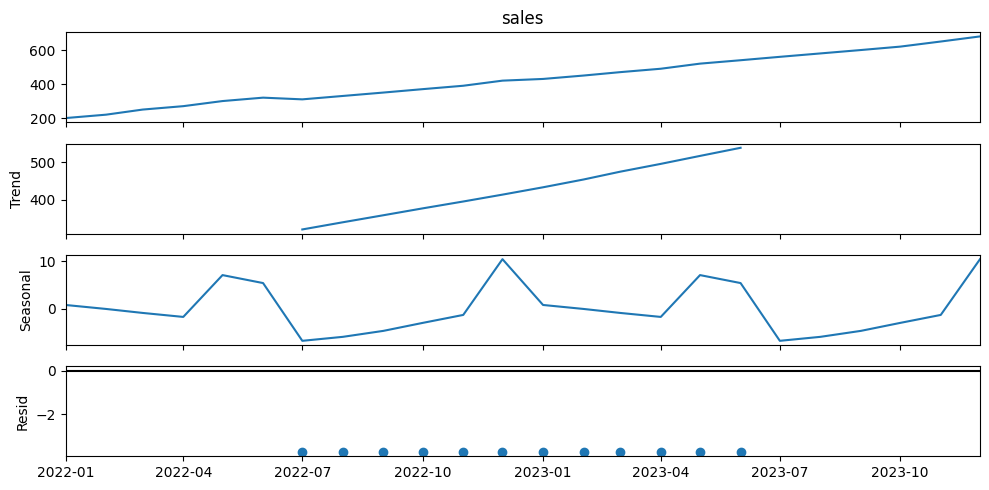

In [7]:
decomposition = seasonal_decompose(df['sales'], model='additive')

decomposition.plot()
plt.show()


In [8]:
model = ARIMA(df['sales'], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())


C:\Users\tanma\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tanma\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ta

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -84.271
Date:                Mon, 16 Feb 2026   AIC                            174.543
Time:                        19:01:59   BIC                            177.949
Sample:                    01-01-2022   HQIC                           175.399
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   5987.088      0.000       1.000       1.000
ma.L1         -0.9952      0.205     -4.865      0.000      -1.396      -0.594
sigma2        72.3010      0.003   2.51e+04      0.0

In [9]:
forecast = model_fit.forecast(steps=6)

print("Future Sales Forecast:")
print(forecast)


Future Sales Forecast:
2024-01-01    700.723395
2024-02-01    721.446750
2024-03-01    742.170066
2024-04-01    762.893343
2024-05-01    783.616581
2024-06-01    804.339779
Freq: MS, Name: predicted_mean, dtype: float64


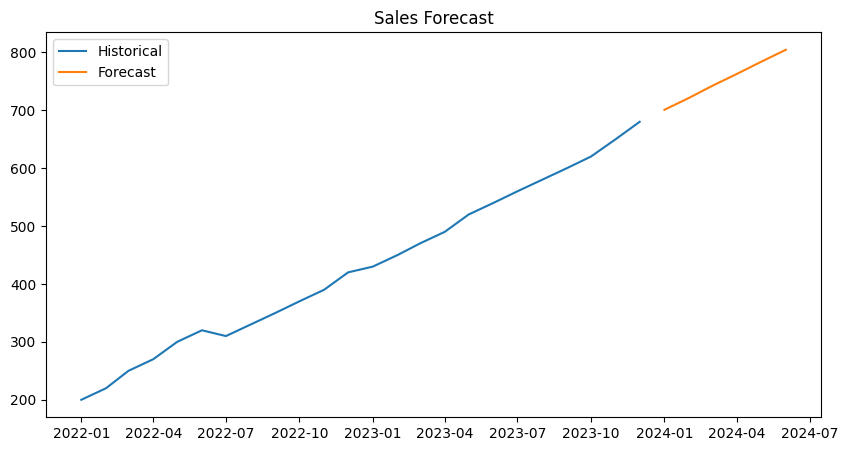

In [10]:
plt.figure()

plt.plot(df['sales'], label='Historical')
plt.plot(forecast, label='Forecast')

plt.legend()
plt.title("Sales Forecast")

plt.show()


In [11]:
print("Final Insights:")

print("- Sales show a steady upward trend over time.")
print("- Seasonal patterns are visible indicating periodic fluctuations.")
print("- The ARIMA model predicts continued growth in future months.")
print("- Businesses can use this forecast for inventory planning and budgeting.")
print("- Forecasting helps reduce stock shortages and improve decision making.")



Final Insights:
- Sales show a steady upward trend over time.
- Seasonal patterns are visible indicating periodic fluctuations.
- The ARIMA model predicts continued growth in future months.
- Businesses can use this forecast for inventory planning and budgeting.
- Forecasting helps reduce stock shortages and improve decision making.
